# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [42]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**The Smartcab doesn't move during one simulation, but it changes location from one trial to the next. A trial is about 119 to 134 steps, based on 3 trials I observed. At each step, the cab is given a positive reward for idling at a red light or a negative reward for idling at a green light. The reward seem to vary between -6 and 3.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
- Agent.py file - In the environment, the number of dummy agents can be set, which represents the number of other cars besides our smartcab in the simulation. For now this feature does not affect the simulation, as the rewards only seem to be affected by the state of the light. However, when our algorithm will be implemented, the number of dummy agents will simulate traffic and will be very important in determining rewards based on traffic code violations. Similary in the environment, the grid_size can be expanded to obtain a greater number of intersections, and the verbose parameter can be set to True to display additional information as the simulation is running, for instance the location of the cab, the direction it is heading in, the reward value and a step_data dictionary that describes the environment inputs (light state, oncoming traffic state, etc.) as well as violation state, time, etc. Another flag that can be set is the enforce_deadline flag, which ends the trial if the cab hasn't reached its destination in the number of steps specified.
- Environment.py file - In the class Environment, the function act is called when an agent performs an action.
- Simulator.py file - The render_text function renders the simulated trial data in the terminal/command prompt, whereas the render function is the GUI render display, or the visual rendering of the simulation via the pygame window.
- Planner.py file - In the next_waypoint function, the first direction considered is East-West, eventually followed by North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


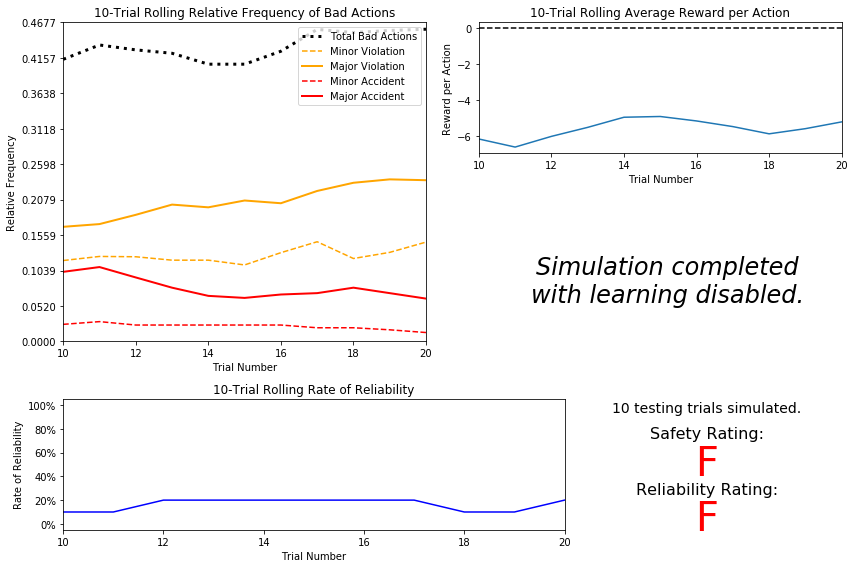

In [43]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** Looking at the upper graph on the left, we see that the frequency of total bad actions is between about 0.4 and 0.45, which is nearly half of the time. Bad actions include violations and accidents, and we see that major accidents happen with a frequency between 0.06 and 0.11, while minor accidents happen have a frequency of around 0.02 to 0.03, for a total frequency of accidents around 8 to 14% of the time, which is high. Unsurprisingly, the safety rating obtained is F, as at least one major accident has occurred, as previously defined by the letter-grade system used. Since we are generating the actions randomly, it is also unsurprising that the reliability rating is F. From the bottom left graph, we see that the destination is reached between 10 and 20% of the time by performing random actions at intersections. From the upper right graph, we see that  average rewards are all negative. Looking at the csv file, we also see that all cumulative rewards for each trial are mostly negative, as they vary between -270 and 1.20. The outcome of results does not improve significantly with the number of trials. The frequency of bad actions increases in later trials and the rate of reliability oscillates between around 10 to 20% as the number of trials increases. This Smartcab cannot be considered either safe or reliable, as indicated by the reliability and safety ratings. The reliability of a random cab cannot be guaranteed because of its nature, and since this cabs commits bad actions almost 50% of the time, including causing major accidents, it cannot be considered safe.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**The waypoint feature is important for efficiency, as the waypoint indicates the direction that the cab should drive in to get to its destination. For safety, the important features to consider are the ones pertaining to features in the environment, such as the traffic lights and the other vehicles driving around. Inputs light, left and oncoming are important, as they will dictate what actions are safe at an intersection. If the light is red, we need to know the intentions of the vehicle to the left of the cab to know if it is safe to turn right, and when the light is green the direction of an oncoming vehicle needs to be assessed to determine if it is safe to turn left. If we are following traffic laws, the direction of a vehicle to our right should not matter, as their presence will not change our actions for a green or red light. 

After progressing further in the project, I removed the deadline feature from the state tuple, as it unnecessarily adds keys to the Q-value dictionary. The policy at an intersection given the waypoint, light state and states of nearby vehicles should be the same independently of the deadline value.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**From the planner.py file, we see that waypoint has 3 possible values, left, right or forward. For inputs, light has 2 values (red or green), left has 4 values (None, left, forward or right) and oncoming has 4 values (None, left, forward or right). This gives us 3*2*4*4= 96. Since each state should be visited many times to be learned, a number of trials in the hundreds could be sufficient, which can reasonably be achieved.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

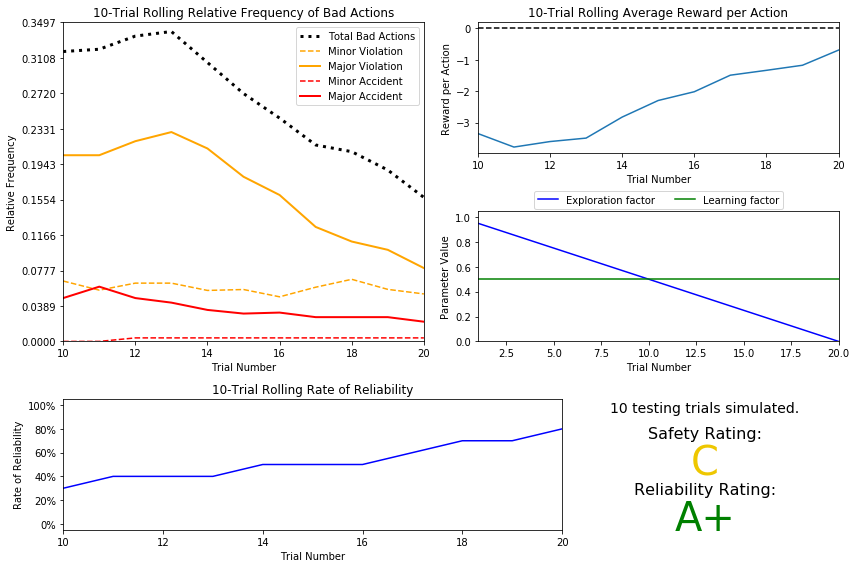

In [45]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**The basic driving agent and the default Q-learning agent both have negative average rewards, however we can clearly see that the Q-learning agent learns at each iteration, as the average reward generally increases as the number of trials increases. For this agent, there are 20 training trials before testing, as can be expected since the initial value of epsilon is 1.0 and it decays by 0.05 after each trial, meaning it is zero by the 20th trial. We see the progression of epsilon in the parameter value graph, where epsilon is the exploration that starts at one and decays to 0 by 20 trials. We also see alpha, whose initial value of 0.5 we haven't varied in this simulation. From the upper left graph, we see that as the number of trials increases, the total number of bad actions decreases as well. We see a similar trend for major violations and accidents. As well, from the upper right graph, we see that the average reward increases as the trials progress, meaning that the agent is making less mistakes. The reliability is now A+, since it went from 30% initially to a little over 80%. This is a great improvement over the basic driving agent. The safety has also improved, however it could be further improved, as the C rating indicates that major violations are still committed.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

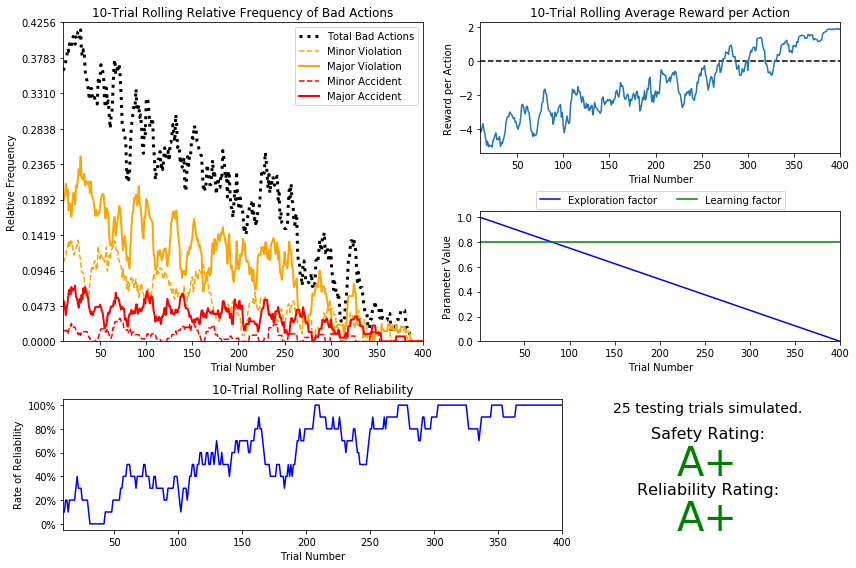

In [39]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**I used a constant decaying function (self.epsilon - 0.0025), in order to be able to do a large number of trials. In the final iteration I used 400 training trials, as 200 and 300 did not give optimal ratings. The epsilon-tolerance did not matter in this case, as the function used goes to zero after 400 iterations. For alpha, I used a value of 0.8, so that the agent would put more importance on newly acquired information. This optimized Q-learner is definitely better than the default one, as ratings for both safety and reliability have improved to A+. Average rewards have gone from negative to positive after completion of the trials. I would say that the agent successfully learned the policy, and that I am satisfied with the ratings obtained.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
1. The optimal policy is as follows: given a green light, the agent should follow the waypoint if it is forward or right. If it is left, the presence and direction of an oncoming vehicle need to be assessed. If the vehicle turns right or goes forward, the agent should idle. If the vehicle turns left or is not present, the agent should turn left. Given a red light, the agent should idle, except when the waypoint is right. If the waypoint is right, the agent should go ahead if the vehicle on the left is turning left or turning right, or if it is not present. If the vehicle on the left is going forward, the agent should idle. 
2. There are some states where the policy is different from the optimal policy. 
3. Most entries have learned the optimal policy, one example being the first state. Given a left waypoint and green light, the direction of the oncoming vehicle should be checked. Since it is turning left, the agent should go ahead and turn left, which is the action that has the greatest Q-value. The same is true for the 8th state, for a right waypoint and a red light. The direction of the left vehicle should be checked, in this case it is going forward. The optimal policy is to idle, which is the action that has the highest Q-value.
4. The agent did not learn the optimal policy in the 2nd state, where we see that the Q-value for 'right' should be the highest given that it is the waypoint and that the light is green, but the value is at 0. This is probably because this state was not visited enough times to converge to the optimal policy. The same thing happened in state 5, where the cab should turn right but the Q-value for right is at 0.

Q dictionary
-------------
state = (waypoint, inputs['light'], inputs['left'], inputs['oncoming'])

('left', 'green', 'forward', 'left')
 -- forward : 0.57
 -- None : -5.80
 -- right : 0.08
 -- left : 2.40

('right', 'green', 'forward', 'right')
 -- forward : -0.36
 -- None : 0.00
 -- right : 0.00
 -- left : 0.75

('right', 'red', None, None)
 -- forward : -9.72
 -- None : 0.55
 -- right : 2.19
 -- left : -15.05

('forward', 'red', 'left', None)
 -- forward : -11.63
 -- None : 1.96
 -- right : 0.66
 -- left : -34.76

('right', 'green', 'right', 'forward')
 -- forward : -0.02
 -- None : -4.39
 -- right : 0.00
 -- left : 0.26

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 2.50
 -- right : 0.45
 -- left : -39.30

('left', 'green', 'right', 'right')
 -- forward : 1.07
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('right', 'red', 'forward', None)
 -- forward : -40.10
 -- None : 0.34
 -- right : -19.40
 -- left : -39.23

('right', 'green', 'left', 'right')
 -- forward : 1.34
 -- None : -4.18
 -- right : 0.00
 -- left : -0.00

('forward', 'red', 'forward', 'right')
 -- forward : -31.59
 -- None : 2.70
 -- right : -16.19
 -- left : 0.00

('left', 'red', 'left', 'forward')
 -- forward : -34.40
 -- None : 1.54
 -- right : 0.52
 -- left : -10.56

('right', 'red', 'right', 'left')
 -- forward : -8.93
 -- None : 0.89
 -- right : 2.66
 -- left : -10.46

('forward', 'red', 'forward', None)
 -- forward : -39.35
 -- None : 1.96
 -- right : -19.89
 -- left : -39.43

('left', 'red', 'right', 'left')
 -- forward : -10.50
 -- None : 1.80
 -- right : 0.28
 -- left : -33.52

('left', 'green', 'left', 'forward')
 -- forward : 1.21
 -- None : -4.89
 -- right : 1.33
 -- left : 1.38

('right', 'red', 'left', 'forward')
 -- forward : -10.26
 -- None : 1.17
 -- right : 2.22
 -- left : -7.52

('left', 'green', None, 'left')
 -- forward : 0.62
 -- None : -4.40
 -- right : -0.18
 -- left : 2.15

('forward', 'red', 'right', 'left')
 -- forward : -15.05
 -- None : 1.73
 -- right : 0.72
 -- left : -9.36

('right', 'red', 'right', 'forward')
 -- forward : -8.95
 -- None : 0.00
 -- right : 2.42
 -- left : -10.15

('forward', 'red', None, 'forward')
 -- forward : -10.07
 -- None : 2.51
 -- right : 0.99
 -- left : -9.53

('left', 'green', 'left', 'left')
 -- forward : 0.35
 -- None : -4.82
 -- right : 0.67
 -- left : 1.25

('right', 'green', None, 'right')
 -- forward : -0.01
 -- None : -4.86
 -- right : 1.69
 -- left : 0.70

('forward', 'green', 'right', 'right')
 -- forward : 2.26
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00

('left', 'green', 'left', None)
 -- forward : 0.41
 -- None : -4.84
 -- right : 0.64
 -- left : 2.36

('right', 'green', 'forward', 'left')
 -- forward : 0.21
 -- None : -4.71
 -- right : 1.92
 -- left : 0.32

('right', 'green', 'left', None)
 -- forward : 0.61
 -- None : -5.44
 -- right : 0.75
 -- left : 0.24

('forward', 'green', 'right', None)
 -- forward : 1.71
 -- None : -5.13
 -- right : 0.22
 -- left : 0.36

('left', 'red', None, 'right')
 -- forward : -10.55
 -- None : 2.15
 -- right : 0.22
 -- left : -39.43

('right', 'red', 'forward', 'right')
 -- forward : -39.24
 -- None : 1.58
 -- right : -16.58
 -- left : -38.34

('left', 'green', 'left', 'right')
 -- forward : 0.40
 -- None : 0.00
 -- right : 1.20
 -- left : 0.00

('forward', 'green', 'right', 'forward')
 -- forward : 1.97
 -- None : -4.79
 -- right : 0.41
 -- left : 1.48

('right', 'green', 'right', None)
 -- forward : 0.10
 -- None : -4.34
 -- right : 2.46
 -- left : 0.59

('right', 'green', 'left', 'left')
 -- forward : 0.55
 -- None : -5.79
 -- right : 1.03
 -- left : 0.36

('left', 'red', 'left', 'left')
 -- forward : -10.00
 -- None : 1.93
 -- right : 0.07
 -- left : -11.06

('forward', 'red', None, 'right')
 -- forward : -9.79
 -- None : 2.36
 -- right : 0.17
 -- left : -39.66

('right', 'red', 'left', 'right')
 -- forward : 0.00
 -- None : 0.80
 -- right : 0.00
 -- left : -38.13

('forward', 'red', 'forward', 'forward')
 -- forward : -39.14
 -- None : 1.45
 -- right : -15.46
 -- left : -40.54

('left', 'red', 'forward', 'right')
 -- forward : -32.32
 -- None : 1.43
 -- right : -15.81
 -- left : -40.22

('left', 'green', 'right', None)
 -- forward : 0.39
 -- None : -5.78
 -- right : 0.29
 -- left : 2.48

('forward', 'green', None, None)
 -- forward : 2.40
 -- None : -4.98
 -- right : 0.65
 -- left : -0.10

('forward', 'green', None, 'left')
 -- forward : 1.60
 -- None : -5.19
 -- right : 0.87
 -- left : 1.01

('left', 'green', 'forward', 'right')
 -- forward : 0.09
 -- None : 0.00
 -- right : 0.73
 -- left : 2.08

('left', 'red', None, 'forward')
 -- forward : -15.40
 -- None : 1.67
 -- right : 0.50
 -- left : -10.42

('forward', 'red', 'forward', 'left')
 -- forward : -40.18
 -- None : 1.27
 -- right : -19.70
 -- left : -40.09

('forward', 'green', 'forward', 'right')
 -- forward : 2.13
 -- None : -4.32
 -- right : 0.40
 -- left : 0.76

('forward', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 1.61
 -- right : 0.00
 -- left : -31.29

('right', 'green', None, 'left')
 -- forward : 1.18
 -- None : -4.85
 -- right : 0.99
 -- left : 0.22

('forward', 'red', None, None)
 -- forward : -9.89
 -- None : 2.25
 -- right : 0.28
 -- left : -10.42

('right', 'red', None, 'right')
 -- forward : -9.46
 -- None : 0.85
 -- right : 2.19
 -- left : -40.65

('left', 'green', None, None)
 -- forward : 0.75
 -- None : -4.69
 -- right : 0.75
 -- left : 1.61

('left', 'red', None, None)
 -- forward : -9.09
 -- None : 2.16
 -- right : 0.61
 -- left : -10.47

('forward', 'red', 'right', 'forward')
 -- forward : -9.25
 -- None : 1.42
 -- right : 0.79
 -- left : -9.72

('right', 'red', 'right', None)
 -- forward : -10.68
 -- None : 0.07
 -- right : 1.87
 -- left : -33.10

('right', 'red', None, 'forward')
 -- forward : -9.48
 -- None : 0.46
 -- right : 1.51
 -- left : -9.71

('forward', 'green', 'forward', 'forward')
 -- forward : 1.31
 -- None : -5.50
 -- right : 0.53
 -- left : 0.86

('forward', 'green', 'left', 'right')
 -- forward : 1.30
 -- None : 0.00
 -- right : 0.39
 -- left : 0.16

('right', 'green', 'forward', 'forward')
 -- forward : 0.49
 -- None : -3.88
 -- right : 2.79
 -- left : 0.27

('left', 'red', None, 'left')
 -- forward : -9.80
 -- None : 1.82
 -- right : 0.63
 -- left : -10.81

('forward', 'red', 'left', 'right')
 -- forward : 0.00
 -- None : 2.47
 -- right : 0.85
 -- left : -31.57

('forward', 'green', 'left', 'left')
 -- forward : 1.95
 -- None : -4.71
 -- right : 0.33
 -- left : 0.42

('forward', 'green', 'left', None)
 -- forward : 1.40
 -- None : -4.79
 -- right : 0.19
 -- left : 0.05

('right', 'green', 'right', 'left')
 -- forward : 0.32
 -- None : -4.55
 -- right : 2.15
 -- left : 1.12

('left', 'green', 'right', 'forward')
 -- forward : 0.72
 -- None : 0.00
 -- right : 0.27
 -- left : 1.98

('forward', 'red', 'left', 'forward')
 -- forward : -10.86
 -- None : 1.46
 -- right : 0.57
 -- left : -10.53

('left', 'green', 'forward', None)
 -- forward : 0.79
 -- None : -5.61
 -- right : 0.95
 -- left : 1.31

('forward', 'green', 'left', 'forward')
 -- forward : 1.13
 -- None : -5.24
 -- right : 0.60
 -- left : 1.04

('right', 'red', 'forward', 'forward')
 -- forward : -32.47
 -- None : 0.70
 -- right : -19.28
 -- left : -31.74

('forward', 'green', None, 'forward')
 -- forward : 1.19
 -- None : -4.40
 -- right : 0.41
 -- left : 0.93

('right', 'red', 'forward', 'left')
 -- forward : -38.50
 -- None : 0.09
 -- right : -19.90
 -- left : -39.87

('left', 'red', 'left', None)
 -- forward : -34.01
 -- None : 2.55
 -- right : 1.05
 -- left : -10.16

('forward', 'green', 'forward', 'left')
 -- forward : 2.50
 -- None : -4.30
 -- right : 0.19
 -- left : 0.65

('right', 'green', 'left', 'forward')
 -- forward : 1.40
 -- None : -4.20
 -- right : 2.87
 -- left : 0.00

('left', 'red', 'forward', 'left')
 -- forward : -40.25
 -- None : 2.65
 -- right : -20.40
 -- left : -40.56

('forward', 'red', 'left', 'left')
 -- forward : -10.24
 -- None : 2.36
 -- right : 0.57
 -- left : -10.54

('left', 'red', 'right', 'forward')
 -- forward : -10.24
 -- None : 1.88
 -- right : 1.42
 -- left : 0.00

('left', 'green', 'right', 'left')
 -- forward : -0.11
 -- None : -5.02
 -- right : 0.56
 -- left : 1.11

('forward', 'red', None, 'left')
 -- forward : -10.45
 -- None : 2.56
 -- right : 0.69
 -- left : -33.95

('right', 'red', 'left', None)
 -- forward : -10.02
 -- None : -0.12
 -- right : 2.27
 -- left : -9.40

('right', 'red', 'left', 'left')
 -- forward : -10.70
 -- None : 0.27
 -- right : 1.16
 -- left : -10.69

('left', 'red', 'left', 'right')
 -- forward : -10.87
 -- None : 2.14
 -- right : 0.36
 -- left : -40.31

('left', 'red', 'forward', 'forward')
 -- forward : -39.98
 -- None : 2.67
 -- right : -20.66
 -- left : -39.86

('forward', 'green', 'forward', None)
 -- forward : 1.83
 -- None : -5.73
 -- right : 1.36
 -- left : 1.49

('right', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : -4.70
 -- right : 1.01
 -- left : 0.00

('left', 'green', None, 'forward')
 -- forward : 0.75
 -- None : -5.64
 -- right : 0.69
 -- left : 1.96

('forward', 'green', 'right', 'left')
 -- forward : 2.41
 -- None : -5.55
 -- right : 0.39
 -- left : 0.18

('forward', 'green', None, 'right')
 -- forward : 1.11
 -- None : -4.78
 -- right : 0.10
 -- left : 0.56

('forward', 'red', 'right', None)
 -- forward : -9.81
 -- None : 1.44
 -- right : 0.58
 -- left : -10.16

('left', 'green', 'forward', 'forward')
 -- forward : 0.11
 -- None : -5.53
 -- right : 0.49
 -- left : 1.64

('left', 'green', None, 'right')
 -- forward : 0.56
 -- None : -4.71
 -- right : 0.17
 -- left : 1.32

('right', 'red', None, 'left')
 -- forward : -33.72
 -- None : 0.19
 -- right : 2.18
 -- left : -34.23

('right', 'green', None, 'forward')
 -- forward : 0.20
 -- None : -5.53
 -- right : 1.79
 -- left : 0.71

('right', 'green', 'forward', None)
 -- forward : 0.63
 -- None : -4.97
 -- right : 1.42
 -- left : 1.81

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 1.57
 -- left : -31.80

('left', 'red', 'forward', None)
 -- forward : -40.64
 -- None : 2.00
 -- right : -19.60
 -- left : -39.87

('left', 'red', 'right', None)
 -- forward : -10.99
 -- None : 1.13
 -- right : 0.21
 -- left : -9.65

('right', 'green', None, None)
 -- forward : 0.26
 -- None : -4.33
 -- right : 2.08
 -- left : 0.60

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**The characteristic that has to do with the smartcab pertains to its limited view of the environment. It knows the state of the light and of the dummy agents only at the intersection that it is currently at. It knows the waypoint for the next state, but will not always follow it and cannot know what will be waiting for it at the next intersection it is at. It is thus difficult to assign future rewards to future states, as they cannot be determined precisely. One way to do it would be to assign future rewards in terms of getting closer to the goal state, but this places too much emphasis on reliability versus safety. Since it would be difficult to implement future rewards based on safety, as the dummy agents have random direction, this a valid reason to omit future rewards for this project. 


The other reason pertains to the environment. After each trial, the destination and the start state change. The smartcab could be closer to it in one trial than in another. Future rewards of a particular intersection would then have to change for each trial and would need to be learned all over again.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.